In [1]:
!pip install -r requirements2.txt

  Using cached PyQtWebEngine-5.12.1-5.12.9-cp35.cp36.cp37.cp38-none-win_amd64.whl (49.0 MB)
  Using cached PyQt5-5.12.3-5.12.9-cp35.cp36.cp37.cp38-none-win_amd64.whl (51.7 MB)


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accesso negato: 'C:\\Users\\Marco\\anaconda3\\Lib\\site-packages\\PyQt5\\QtCore.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
#sono consapevole di non aver snellito il file "requirements1.txt", ma la cosa è pienamente voluta per non rischiare che ci siano incompatibilità tra ambienti diversi

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import plot_confusion_matrix

In [4]:
df_train= pd.read_csv('train.csv') #leggo il file train.csv

In [5]:
df_test= pd.read_csv('test.csv') #leggo il file test.csv

In [6]:
df_train.info() #cerco di capire le caratteristiche dei dati che ho letto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                179 non-null    int64  
 1   DEATH_EVENT               179 non-null    int64  
 2   age                       179 non-null    float64
 3   anaemia                   179 non-null    int64  
 4   creatinine_phosphokinase  179 non-null    int64  
 5   diabetes                  179 non-null    int64  
 6   ejection_fraction         179 non-null    int64  
 7   high_blood_pressure       179 non-null    int64  
 8   platelets                 179 non-null    float64
 9   serum_creatinine          179 non-null    float64
 10  serum_sodium              179 non-null    int64  
 11  sex                       179 non-null    int64  
 12  smoking                   179 non-null    int64  
 13  time                      179 non-null    int64  
dtypes: float64

In [7]:
df_test.info() #cerco di capire le caratteristiche dei dati che ho letto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                60 non-null     int64  
 1   DEATH_EVENT               60 non-null     int64  
 2   age                       60 non-null     float64
 3   anaemia                   60 non-null     int64  
 4   creatinine_phosphokinase  60 non-null     int64  
 5   diabetes                  60 non-null     int64  
 6   ejection_fraction         60 non-null     int64  
 7   high_blood_pressure       60 non-null     int64  
 8   platelets                 60 non-null     float64
 9   serum_creatinine          60 non-null     float64
 10  serum_sodium              60 non-null     int64  
 11  sex                       60 non-null     int64  
 12  smoking                   60 non-null     int64  
 13  time                      60 non-null     int64  
dtypes: float64(3

In [8]:
# Controllo l'eventuale presenza di valori nulli nel training set
print(df_train.isnull().sum(axis = 0))

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


In [9]:
# Controllo l' eventuale presenza di valori nulli nel test set
print(df_test.isnull().sum(axis = 0))

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


In [10]:
df_train.head()# faccio una stampa di prova del training set

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,125,0,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146
1,181,0,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33
2,78,0,58.0,1,400,0,40,0,164000.0,1.0,139,0,0,91
3,133,1,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10
4,66,0,43.0,1,358,0,50,0,237000.0,1.3,135,0,0,97


In [11]:
df_test.head() # faccio una stampa di prova del test set

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,220,1,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20
1,142,0,63.0,1,582,0,40,0,448000.00,0.90,137,1,1,123
2,30,0,58.0,0,582,1,25,0,504000.00,1.00,138,1,0,205
3,39,0,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
4,167,0,78.0,0,224,0,50,0,481000.00,1.40,138,1,1,192


In [12]:
df_train.nunique() #stampo dei dati che riguardano le caratteristiche dei dati

Unnamed: 0                  179
DEATH_EVENT                   2
age                          44
anaemia                       2
creatinine_phosphokinase    140
diabetes                      2
ejection_fraction            16
high_blood_pressure           2
platelets                   122
serum_creatinine             34
serum_sodium                 24
sex                           2
smoking                       2
time                        109
dtype: int64

In [13]:
df_test.nunique() #stampo dei dati che riguardano le caratteristiche dei dati

Unnamed: 0                  60
DEATH_EVENT                  2
age                         26
anaemia                      2
creatinine_phosphokinase    50
diabetes                     2
ejection_fraction           10
high_blood_pressure          2
platelets                   52
serum_creatinine            20
serum_sodium                19
sex                          2
smoking                      2
time                        52
dtype: int64

In [14]:
#anche se non mi aspetto valori nulli faccio lo stesso l'operazione di eliminazione di essi
df2_train= df_train.dropna() 

In [15]:
#nel file di test non mi sorprenderebbe la presenza di valori nulli, quindi preventivamente li elimino
df2_test= df_test.dropna() 

In [16]:
# Controllo la presenza di valori nulli
print(df2_train.isnull().sum(axis = 0))

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


In [17]:
# Controllo la presenza di valori nulli
print(df2_test.isnull().sum(axis = 0))

Unnamed: 0                  0
DEATH_EVENT                 0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64


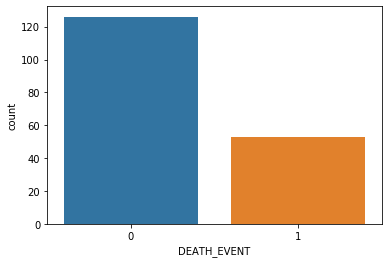

In [18]:
ax = sns.countplot(x="DEATH_EVENT", data=df2_train) #con questo noto che circa il 2/3 delle volte si sopravvive nel training set

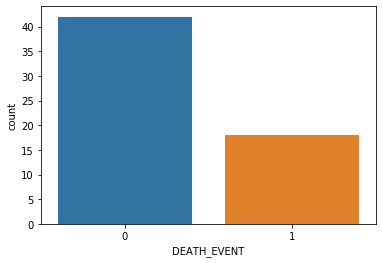

In [19]:
ax = sns.countplot(x="DEATH_EVENT", data=df2_test) #con questo noto che 2/3 delle volte si sopravvive nel test set

In [20]:
# posso affermare che nel mio training set circa il 2/3 delle volte si sopravvive, anche se l'ideale sarebbe stato avere i dati più distribuiti
#quindi se il mio classificatore dicesse che non ci sarebbero morti, indovinerebbe circa il 66% delle volte

In [21]:
#faccio altri grafici per capire meglio la distrubuzuone dei dati

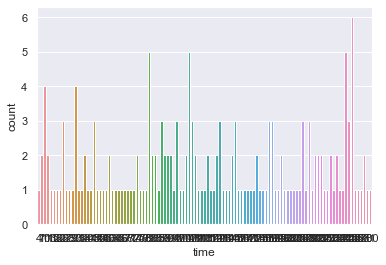

In [22]:
#faccio qualche grafico di prova per farmi un'idea di come sono distribuiti i dati
sns.set(style="darkgrid")
ax = sns.countplot(x="time", data=df2_train)
#questo grafico lo lascio per completezza, ma non riesco a ricavarne nulla

In [23]:
df2_train[['time', 'DEATH_EVENT']].groupby(['time']).count().sort_values(by='DEATH_EVENT', ascending=True)
#mi aspettavo che il numero delle morti fosse direttamente proporzionato al perido di osservezione, ma non è così

,DEATH_EVENT
time,
4,1
175,1
172,1
171,1
162,1
...,...
10,4
107,5
244,5


In [24]:
df2_test[['time', 'DEATH_EVENT']].groupby(['time']).count().sort_values(by='DEATH_EVENT', ascending=True)
#mi aspettavo che il numero delle morti fosse direttamente proporzionato al perido di osservezione, ma non è così

,DEATH_EVENT
time,
6,1
278,1
135,1
140,1
146,1
148,1
172,1
174,1
192,1


In [25]:
y_train= df2_train['DEATH_EVENT'] #sono le stesse per ogni tipologia di classificatore che userò

In [26]:
y_test= df2_test['DEATH_EVENT'] #sono le stesse per ogni tipologia di classificatore che userò

In [27]:
X_trainDTC= df2_train[['age','anaemia', 'creatinine_phosphokinase','diabetes', 'ejection_fraction','high_blood_pressure',  'platelets', 'serum_creatinine','serum_sodium', 'sex', 'smoking', 'time']]

#DTC sta ad indicare deciosion tree classifier poichè proverò più di un tipo di classificatore
#in particolare addestrerò i classificatori con dati diversi
#ho provato anche a non considerare alcune features solo per il DTC, ma senza successo

In [28]:
X_testDTC= df2_test[['age','anaemia', 'creatinine_phosphokinase','diabetes', 'ejection_fraction','high_blood_pressure',  'platelets', 'serum_creatinine','serum_sodium', 'sex', 'smoking', 'time']]
#DTC sta ad indicare deciosion tree classifier poichè proverò più di un tipo di classificatore
#in particolare addestrerò i classificatori con dati diversi
#ho provato anche a non considerare alcune features solo per il DTC, ma senza successo

In [29]:
y_train.head()

0    0
1    0
2    0
3    1
4    0
Name: DEATH_EVENT, dtype: int64

In [30]:
X_trainDTC.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,52.0,0,3966,0,40,0,325000.0,0.9,140,1,1,146
1,72.0,0,127,1,50,1,218000.0,1.0,134,1,0,33
2,58.0,1,400,0,40,0,164000.0,1.0,139,0,0,91
3,62.0,0,231,0,25,1,253000.0,0.9,140,1,1,10
4,43.0,1,358,0,50,0,237000.0,1.3,135,0,0,97


In [31]:
y_test.head()

0    1
1    0
2    0
3    0
4    0
Name: DEATH_EVENT, dtype: int64

In [32]:
X_testDTC.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,65.0,1,128,1,30,1,297000.00,1.60,136,0,0,20
1,63.0,1,582,0,40,0,448000.00,0.90,137,1,1,123
2,58.0,0,582,1,25,0,504000.00,1.00,138,1,0,205
3,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87
4,78.0,0,224,0,50,0,481000.00,1.40,138,1,1,192


In [33]:
#il primo tipo di classificatore che ho provato è il DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=9)
model1.fit(X_trainDTC,y_train)

DecisionTreeClassifier(max_depth=9)

In [34]:
p_train1=model1.predict(X_trainDTC)
p_test1=model1.predict(X_testDTC)
acc_train1=accuracy_score(y_train, p_train1)
acc_test1=accuracy_score(y_test, p_test1)

In [35]:
#stampo i valori delle metriche che ho scelto di utilizzare per verificare il funzionamento del classificatore
print("acc_train con DecisionTreeClassifier", acc_train1)
print("acc_test con DecisionTreeClassifier", acc_test1)

acc_train con DecisionTreeClassifier 0.994413407821229
acc_test con DecisionTreeClassifier 0.7833333333333333


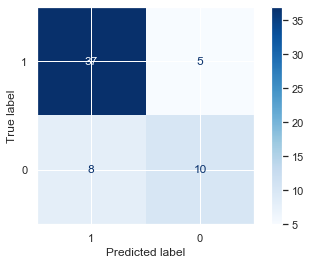

In [36]:
class_names = y_test

disp = plot_confusion_matrix(model1, X_testDTC, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [37]:
#su 60 dati di test, ho 13 volte una predizione sbagliata, di cui 8 quando la persona sopravvive e 5 quando la persona muore
#tale affermazione si riferisce all'ultima prova che ho fatto, è del tutto lecito che non sia così durante l'esecuzione da parte del professore

In [38]:
X_trainKNN= df2_train[['age','anaemia',  'diabetes', 'ejection_fraction',  'high_blood_pressure',  'serum_creatinine','sex', 'smoking', 'time']]

#KNN sta ad indicare KNeighborsClassifier poichè proverò più di un tipo di classificatore
#ho provato anche a non considerare alcune features solo per il KNN, ma senza successo
#anche non considerare 'creatinine_phosphokinase' ha aumentato il livello di accuratezza

In [39]:
X_testKNN= df2_test[['age', 'anaemia',   'diabetes',  'ejection_fraction',  'high_blood_pressure',  'serum_creatinine','sex', 'smoking', 'time']]

#KNN sta ad indicare KNeighborsClassifier poichè proverò più di un tipo di classificatore
#ho provato anche a non considerare la features   'platelets' per il KNN e sicuramento ha aumentato il livello di accuratezza del mio classificatore
#anche non considerare 'creatinine_phosphokinase' ha aumentato il livello di accuratezza
#anche non considerare 'creatinine_phosphokinase' ha aumentato il livello di accuratezza

#provado a selezionare le stesse righe anche per il DecisionTreeClassifier ottengo un'accuretezza nettamente inferiore

In [40]:
X_trainKNN.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,time
0,52.0,0,0,40,0,0.9,1,1,146
1,72.0,0,1,50,1,1.0,1,0,33
2,58.0,1,0,40,0,1.0,0,0,91
3,62.0,0,0,25,1,0.9,1,1,10
4,43.0,1,0,50,0,1.3,0,0,97


In [41]:
X_testKNN.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,sex,smoking,time
0,65.0,1,1,30,1,1.60,0,0,20
1,63.0,1,0,40,0,0.90,1,1,123
2,58.0,0,1,25,0,1.00,1,0,205
3,75.0,0,0,45,1,1.18,1,0,87
4,78.0,0,0,50,0,1.40,1,1,192


In [42]:
#il secondo dipo di classificatore che ho sperimentato è KNeighborsClassifier
model2 = KNeighborsClassifier(11) #11 è il numero dei 'vicini'
#l'algoritmo rappresenta i patter in uno spazio a tante dimensioni quante sono le features scelte per l'addestramento
#attraverso il concetto di "distanza" per ogni pattern del test set si stimano gli 11 pattern più vicini
#la classe del patter che si vuole predire è la stessa a cui appartiene la maggioranza fra i suoi 11 vicini
#11 è un iperparametro

In [43]:
model2.fit(X_trainKNN,y_train) #per addestrare faccio vedere sia esempi che risposte

p_train2=model2.predict(X_trainKNN) #gli do da predire i dati di test
p_test2=model2.predict(X_testKNN)

In [44]:
acc_train2=accuracy_score(y_train, p_train2)#vuole sapere quali sono le risposte desiderate e quali sono le nostre risposte
acc_test2=accuracy_score(y_test, p_test2)#vuole sapere quali sono le risposte desiderate e quali sono le nostre risposte

print("acc_train con KNeighborsClassifier", acc_train2)
print("acc_test con KNeighborsClassifier", acc_test2)

acc_train con KNeighborsClassifier 0.8715083798882681
acc_test con KNeighborsClassifier 0.8


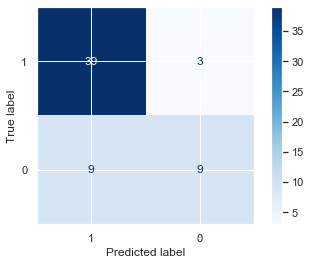

In [45]:
class_names = y_test

disp = plot_confusion_matrix(model2, X_testKNN, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [46]:
# su 60 dati di test, ho 9 volte una predizione sbagliata, di cui 1 quando la persona sopravvive ed 8 quando la persona muore
#tale affermazione si riferisce all'ultima prova che ho fatto, è del tutto lecito che non sia così durante l'esecuzione da parte del professore

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
X_trainLOG= df2_train[['age','anaemia', 'creatinine_phosphokinase','diabetes', 'platelets', 'ejection_fraction','high_blood_pressure',  'serum_creatinine','serum_sodium', 'sex', 'smoking', 'time']]
#ho scelto l'acronimo LOG per indicare la regressione logistica
# con X_trainLOG e X_testLOG ho addestrato il LogisticRegression

In [49]:
X_testLOG= df2_test[['age','anaemia', 'creatinine_phosphokinase','diabetes',  'platelets', 'ejection_fraction','high_blood_pressure',  'serum_creatinine','serum_sodium', 'sex', 'smoking', 'time']]
#ho scelto l'acronimo LOG per indicare la regressione logistica
# con X_trainLOG e X_testLOG ho addestrato il LogisticRegression

In [50]:
X_trainLOG.head()

,age,anaemia,creatinine_phosphokinase,diabetes,platelets,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time
0,52.0,0,3966,0,325000.0,40,0,0.9,140,1,1,146
1,72.0,0,127,1,218000.0,50,1,1.0,134,1,0,33
2,58.0,1,400,0,164000.0,40,0,1.0,139,0,0,91
3,62.0,0,231,0,253000.0,25,1,0.9,140,1,1,10
4,43.0,1,358,0,237000.0,50,0,1.3,135,0,0,97


In [51]:
X_testLOG.head()

,age,anaemia,creatinine_phosphokinase,diabetes,platelets,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time
0,65.0,1,128,1,297000.00,30,1,1.60,136,0,0,20
1,63.0,1,582,0,448000.00,40,0,0.90,137,1,1,123
2,58.0,0,582,1,504000.00,25,0,1.00,138,1,0,205
3,75.0,0,582,0,263358.03,45,1,1.18,137,1,0,87
4,78.0,0,224,0,481000.00,50,0,1.40,138,1,1,192


In [52]:
logistic = LogisticRegression()
logistic.fit(X_trainLOG, y_train)

LogisticRegression()

In [53]:
print("Training set score: {:.4f}".format(logistic.score(X_trainLOG, y_train)))
print("Test set score: {:.4f}".format(logistic.score(X_testLOG, y_test)))

Training set score: 0.8380
Test set score: 0.8667


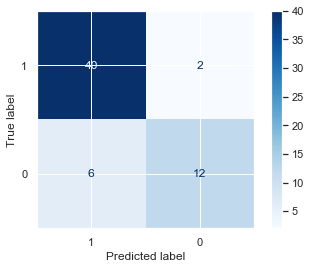

In [54]:
class_names = y_test

disp = plot_confusion_matrix(logistic, X_testLOG, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [55]:
# su 60 pattern del test set ho 9 predizioni sbagliate, di cui 4 quando la persona sopravvive e 5 quando la persona muore
#La regressione logistica non è quella che mi dà la soconda miglior accuratezza
# in particolare ci sono 9 predizioni errate
#tale affermazione si riferisce all'ultima prova che ho fatto, è del tutto lecito che non sia così durante l'esecuzione da parte del professore

In [56]:
print("Il KNeighborsClassifie è il sistema di predizione che mi dà la migliore accuratezza" )
print("acc_train con KNeighborsClassifier", acc_train2)
print("acc_test con KNeighborsClassifier", acc_test2)

Il KNeighborsClassifie è il sistema di predizione che mi dà la migliore accuratezza
acc_train con KNeighborsClassifier 0.8715083798882681
acc_test con KNeighborsClassifier 0.8


In [57]:
 !pip freeze > requirements2.txt